Relative changes in each group (for the paper)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

##### directories #####
add_eeg_dir = f'../../2306_elan/preprocessing/11_add_Transcrip_to_IM'
subject_ID_csv_list = sorted(os.listdir(f'{add_eeg_dir}'))
subject_ID_list = [i.removesuffix('.csv') for i in subject_ID_csv_list]

all_open_close_pxx_df = pd.read_csv(f'../rest_and_btw_log/1701767293/resting_session/all_open_close_pxx_df.csv', header=0)
all_open_close_pxx_df_2306M2002 = pd.read_csv(f'../rest_and_btw_log/1706949098/resting_session/all_open_close_pxx_df_2306M2002.csv', header=0)
all_open_close_pxx_df = pd.concat([all_open_close_pxx_df,all_open_close_pxx_df_2306M2002], axis=0).reset_index(drop=True)
all_recall_pxx_df = pd.read_csv(f'../rest_and_btw_log/1703138526/recall_session/all_recall_pxx_df.csv', header=0)

relative_changes_type_df = pd.DataFrame(columns=['subject_ID', 'wave_type'])
for subject_ID in subject_ID_list:

    #print(subject_ID)

    tmp_QUE = 'subject_ID == ' + '\"' + subject_ID + '\"'

    subject_open_df = all_open_close_pxx_df[all_open_close_pxx_df["ex_ID"].str.contains("open")]
    subject_open_df = subject_open_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)
    subject_open_df = subject_open_df.div(subject_open_df.sum(axis=1), axis=0)

    subject_recall_df = all_recall_pxx_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)

    recall_change_level_each_bin = (subject_recall_df.mean(axis=0) / subject_open_df.mean(axis=0)).reset_index(drop=True)

    delta = 0; theta = 0; alpha = 0; beta = 0; gamma = 0
    for bin, value in zip(range(45), recall_change_level_each_bin):
        if bin in np.arange(0,3,1):
            if value > 1:
                delta += value
        elif bin in np.arange(3,6,1):
            if value > 1:
                theta += value
        elif bin in np.arange(7,12,1):
            if value > 1:
                alpha += value 
        elif bin in np.arange(12,29,1):
            if value > 1:
                beta += value 
        elif bin in np.arange(29,45,1):
            if value > 1:
                gamma += value
        else:
            pass

    #sect_feat_bin = np.arange(0,3,1)   ##### delta     frequency corresponded to IM00-IM02 1 < w < 4
    #sect_feat_bin = np.arange(3,6,1)   ##### theta     frequency corresponded to IM03-IM05 4 < w < 7
    #sect_feat_bin = np.arange(7,12,1)  ##### alpha    frequency corresponded to IM07-IM11 8 < w < 13
    #sect_feat_bin = np.arange(12,29,1) ##### beta      frequency corresponded to IM12-IM28 13 < w < 30
    #sect_feat_bin = np.arange(29,45,1) ##### gamma     frequency corresponded to IM29-IM44 30 < w < 45

    type = ['delta', 'theta', 'alpha', 'beta', 'gamma'][np.argmax([delta, theta, alpha, beta, gamma])]
    tmp_df = pd.DataFrame({'subject_ID': [subject_ID], 'wave_type': [type],
                           'delta': delta,
                           'theta': theta,
                           'alpha': alpha,
                           'beta': beta,
                           'gamma': gamma})
    relative_changes_type_df = pd.concat([relative_changes_type_df, tmp_df], axis=0).reset_index(drop=True)

relative_changes_type_df.to_csv(f'../paper_result/Relative_changes/relative_changes_type_df.csv')


mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

fig = plt.figure()
plt.clf()

cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(6.5*cm, 6.5*cm))
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 8

### five type
# for wave_type, color, colorfill, linestyle, legendlabel, linewidth in zip(['delta', 'theta', 'alpha', 'beta', 'gamma'],
#                                                   ['red', 'blue', 'black', 'black', 'orange'], #['red', 'blue', 'pink', 'purple', 'orange'],
#                                                   ['red', 'blue', 'navy', '#A62121', 'orange'],
#                                                   ['solid', 'dashed', 'dashdot', (0, (3, 1, 1, 1, 1, 1)), 'dotted'],
#                                                   [r"$\delta$", r"$\theta$",  r"$\alpha$", r"$\beta$", r"$\gamma$"],
#                                                   [0.75, 0.75, 0.5, 0.5, 0.75]): #[r"$\delta$", r"$\theta$", r"$\gamma$"]
### three type
# for wave_type, color, colorfill, linestyle, legendlabel, linewidth in zip(['delta', 'theta','gamma'],
#                                                                             ['red', 'blue', 'orange'], #['red', 'blue', 'pink', 'purple', 'orange'],
#                                                                             ['red', 'blue', 'orange'],
#                                                                             ['solid', 'dashed', 'dotted'],
#                                                                             [r"$\delta$", r"$\theta$",  r"$\gamma$"],
#                                                                             [0.75, 0.75, 0.75]): #[r"$\delta$", r"$\theta$", r"$\gamma$"]
### four type
for wave_type, color, colorfill, linestyle, legendlabel, linewidth, alpha in zip(['delta', 'theta','gamma', 'alpha'],
                                                                            ['#388E3C','#E040FB', 'black', 'black'], #['red', 'blue', 'pink', 'purple', 'orange'],
                                                                            ['#388E3C','#E040FB', 'black', '#4169e100'],
                                                                            ['solid', 'dashed', 'dotted', 'dashdot'],
                                                                            [r"$\delta$", r"$\theta$",  r"$\gamma$", r"$\alpha \& \beta$"],
                                                                            [0.75, 0.75, 0.75, 0.5],
                                                                            [0.4, 0.2, 0.1, 1]): #[r"$\delta$", r"$\theta$", r"$\gamma$"]
    
    ave_df = pd.DataFrame()
    for subject_ID in subject_ID_list:

        if not wave_type == relative_changes_type_df.query('subject_ID==@subject_ID')['wave_type'].iloc[-1]:           
            continue

        tmp_QUE = 'subject_ID == ' + '\"' + subject_ID + '\"'

        subject_open_df = all_open_close_pxx_df[all_open_close_pxx_df["ex_ID"].str.contains("open")]       
        subject_open_df = subject_open_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)
        subject_open_df = subject_open_df.div(subject_open_df.sum(axis=1), axis=0)

        subject_recall_df = all_recall_pxx_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)

        recall_change_level_each_bin = (subject_recall_df.mean(axis=0) / subject_open_df.mean(axis=0)).reset_index(drop=True)
        
        tmp_df3 = pd.DataFrame(recall_change_level_each_bin).T
        tmp_df3.insert(0, 'subject_ID', subject_ID)
        

        ave_df = pd.concat([ave_df, tmp_df3], axis=0)
        ave_df.to_csv(f'../paper_result/Relative_changes/ave_{wave_type}_df.csv', index=False)
                       
        ### only four type
        if wave_type == 'alpha':
            tmp_QUE = 'subject_ID == ' + '\"' + '2306F3002' + '\"' # beta
            subject_open_df = all_open_close_pxx_df[all_open_close_pxx_df["ex_ID"].str.contains("open")]       
            subject_open_df = subject_open_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)
            subject_open_df = subject_open_df.div(subject_open_df.sum(axis=1), axis=0)
            subject_recall_df = all_recall_pxx_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)
            recall_change_level_each_bin = (subject_recall_df.mean(axis=0) / subject_open_df.mean(axis=0)).reset_index(drop=True)
            
            tmp_df3 = pd.DataFrame(recall_change_level_each_bin).T.reset_index(drop=True)
            tmp_df3.insert(0, 'subject_ID', '2306F3002')

            ave_df = pd.concat([ave_df, tmp_df3], axis=0).reset_index(drop=True)
            ave_df.to_csv(f'../paper_result/Relative_changes/ave_{wave_type}_df.csv', index=False)
            
    ave_df = ave_df.drop('subject_ID', axis=1)
    label = wave_type.title() + ' group' + r", $n=$" + len(ave_df).__str__() # wave_type.title(), legendlabel
    if wave_type == 'alpha':
        label = "Alpha & Beta group" + r", $n=2$" #r"$\alpha$" + ' or ' + r"$\beta$" + ' type' + r", $n=2$"
        plt.plot(np.arange(1,46,1), ave_df.mean(axis=0), color=color, label=label, linestyle=linestyle, linewidth=linewidth)
    else:
        plt.fill_between(np.arange(1,46,1), ave_df.mean(axis=0) + ave_df.std(axis=0, ddof=1), ave_df.mean(axis=0) - ave_df.std(axis=0, ddof=1), alpha=alpha, color=colorfill, linewidth=0.1)
        plt.plot(np.arange(1,46,1), ave_df.mean(axis=0), color=color, label=label, linestyle=linestyle, linewidth=linewidth)

plt.yticks([0, 1, 2, 3, 4, 5])
plt.ylim(-1, 5.3)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Relative changes in each frequency bin\n(Recall / Resting)")
plt.legend(fontsize=6.5, loc='upper center', bbox_to_anchor=(0.66, 1.075), ncol=1, columnspacing=0.4, frameon=False) #, bbox_to_anchor=(1, 1), labelspacing=0.775
#plt.plot(np.arange(1,46,1), np.ones(45), linestyle='solid', linewidth=0.25, color='black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig(f'../paper_result/Relative_changes/relative_changes_in_each_wavetype_group.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
result = pd.read_csv(f'/home/katada/Desktop/def_dir/under_def_2nd/paper_result/TAVPIM_rand_corr_bin_20240210195014/tmp.csv', header=0)
modal = '[\'IM\']'

all_df = pd.DataFrame()
for valid_target in ['NONE', 'random', 'corr', 'bin_sect_thres']:
    res_list=[]
    valid_result = result.query('modal_comb==@modal').query('valid_target==@valid_target').reset_index(drop=True)
    tmp = pd.concat([relative_changes_type_df, valid_result], axis=1)
    for metrics in ['MAE', 'Rs']:
        for wave in ['delta', 'theta', 'alpha', 'beta', 'gamma']:
            #print(valid_target, wave, metrics, np.round(tmp.query('wave_type==@wave')[metrics].mean(), decimals=2))
            
            res_list.append(np.round(tmp.query('wave_type==@wave')[metrics].mean(), decimals=2))
            
    tmp_df2 = pd.DataFrame(data=np.array(res_list).reshape(1,10),
                        index=[valid_target],
                        columns=['delta_MAE', 'theta_MAE', 'alpha_MAE', 'beta_MAE', 'gamma_MAE', 'delta_corr', 'theta_corr', 'alpha_corr', 'beta_corr', 'gamma_corr'])
    
    all_df = pd.concat([all_df, tmp_df2], axis=0)
    
all_df.to_csv(f'../paper_result/method_comp.csv', index=True)
all_df

Relative changes in Age

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
##### directories #####
add_eeg_dir = f'../../2306_elan/preprocessing/11_add_Transcrip_to_IM'
subject_ID_csv_list = sorted(os.listdir(f'{add_eeg_dir}'))
subject_ID_list = [i.removesuffix('.csv') for i in subject_ID_csv_list]

all_open_close_pxx_df = pd.read_csv(f'../rest_and_btw_log/1701767293/resting_session/all_open_close_pxx_df.csv', header=0)
all_open_close_pxx_df_2306M2002 = pd.read_csv(f'../rest_and_btw_log/1706949098/resting_session/all_open_close_pxx_df_2306M2002.csv', header=0)
all_open_close_pxx_df = pd.concat([all_open_close_pxx_df,all_open_close_pxx_df_2306M2002], axis=0).reset_index(drop=True)
all_recall_pxx_df = pd.read_csv(f'../rest_and_btw_log/1703138526/recall_session/all_recall_pxx_df.csv', header=0)

mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

fig = plt.figure()
plt.clf()
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(6.5*cm, 6.5*cm))
plt.rcParams["font.size"] = 8

for remove_age_list, color, label, linestyle, alpha in zip([['40', '50', '60', '70'], ['20', '30', '60', '70'], ['20', '30', '40', '50']],
                                                    ['#388E3C','#E040FB', 'black'],
                                                    ['20s'+u"\u2013"+'30s group', '40s'+u"\u2013"+'50s group', '60s'+u"\u2013"+'70s group'],
                                                    ['solid', 'dashed', 'dotted'],
                                                    [0.175, 0.2, 0.125]):
    ave_df = pd.DataFrame()
    for subject_ID in subject_ID_list:

        if any((s in subject_ID.removeprefix('2306')) for s in remove_age_list):
            continue

        tmp_QUE = 'subject_ID == ' + '\"' + subject_ID + '\"'

        subject_open_df = all_open_close_pxx_df[all_open_close_pxx_df["ex_ID"].str.contains("open")]       
        subject_open_df = subject_open_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)
        subject_open_df = subject_open_df.div(subject_open_df.sum(axis=1), axis=0)

        subject_recall_df = all_recall_pxx_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)

        recall_change_level_each_bin = (subject_recall_df.mean(axis=0) / subject_open_df.mean(axis=0)).reset_index(drop=True)
        ave_df = pd.concat([ave_df, pd.DataFrame(recall_change_level_each_bin).T], axis=0)
        
    label = label + r", $n=$" + len(ave_df).__str__() # wave_type.title(), legendlabel
    plt.fill_between(np.arange(1,46,1), ave_df.mean(axis=0) + ave_df.std(axis=0, ddof=1), ave_df.mean(axis=0) - ave_df.std(axis=0, ddof=1), alpha=alpha, color=color, linewidth=0.1)
    plt.plot(np.arange(1,46,1), ave_df.mean(axis=0), color=color, label=label, linestyle=linestyle, linewidth=0.75)

plt.yticks([0, 1, 2, 3, 4, 5])
plt.ylim(-1, 3.8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Relative changes in each frequency bin\n(Recall / Resting)")
plt.legend(fontsize=6.5, loc='upper center', bbox_to_anchor=(0.69, 1.075), ncol=1, columnspacing=0.4, frameon=False) #, bbox_to_anchor=(1, 1), labelspacing=0.775
#plt.plot(np.arange(1,46,1), np.ones(45), linestyle='solid', linewidth=0.25, color='black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig(f'../paper_result/Relative_changes/relative_changes_in_each_age_group.png', dpi=600, bbox_inches='tight')
plt.show()


Relative changes in Sex

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
##### directories #####
add_eeg_dir = f'../../2306_elan/preprocessing/11_add_Transcrip_to_IM'
subject_ID_csv_list = sorted(os.listdir(f'{add_eeg_dir}'))
subject_ID_list = [i.removesuffix('.csv') for i in subject_ID_csv_list]

all_open_close_pxx_df = pd.read_csv(f'../rest_and_btw_log/1701767293/resting_session/all_open_close_pxx_df.csv', header=0)
all_open_close_pxx_df_2306M2002 = pd.read_csv(f'../rest_and_btw_log/1706949098/resting_session/all_open_close_pxx_df_2306M2002.csv', header=0)
all_open_close_pxx_df = pd.concat([all_open_close_pxx_df,all_open_close_pxx_df_2306M2002], axis=0).reset_index(drop=True)
all_recall_pxx_df = pd.read_csv(f'../rest_and_btw_log/1703138526/recall_session/all_recall_pxx_df.csv', header=0)

mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

fig = plt.figure()
plt.clf()
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(6.5*cm, 6.5*cm))
plt.rcParams["font.size"] = 8


    
for remove_sex_list, color, label, linestyle in zip(['F', 'M'],
                                                    ['#388E3C','#E040FB'],
                                                    ['Female group', 'Male group'],
                                                    ['solid', 'dashed']):
    ave_df = pd.DataFrame()
    for subject_ID in subject_ID_list:

        if any((s in subject_ID.removeprefix('2306')) for s in remove_sex_list):
            continue

        tmp_QUE = 'subject_ID == ' + '\"' + subject_ID + '\"'

        subject_open_df = all_open_close_pxx_df[all_open_close_pxx_df["ex_ID"].str.contains("open")]       
        subject_open_df = subject_open_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)
        subject_open_df = subject_open_df.div(subject_open_df.sum(axis=1), axis=0)

        subject_recall_df = all_recall_pxx_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)

        recall_change_level_each_bin = (subject_recall_df.mean(axis=0) / subject_open_df.mean(axis=0)).reset_index(drop=True)
        ave_df = pd.concat([ave_df, pd.DataFrame(recall_change_level_each_bin).T], axis=0)
        
    label = label + r", $n=$" + len(ave_df).__str__() # wave_type.title(), legendlabel
    plt.fill_between(np.arange(1,46,1), ave_df.mean(axis=0) + ave_df.std(axis=0, ddof=1), ave_df.mean(axis=0) - ave_df.std(axis=0, ddof=1), alpha=0.2, color=color, linewidth=0.1)
    plt.plot(np.arange(1,46,1), ave_df.mean(axis=0), color=color, label=label, linestyle=linestyle, linewidth=0.75)

plt.yticks([0, 1, 2, 3, 4, 5])
plt.ylim(-1, 3.8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Relative changes in each frequency bin\n(Recall / Resting)")
plt.legend(fontsize=6.5, loc='upper center', bbox_to_anchor=(0.7, 1.075), ncol=1, columnspacing=0.4, frameon=False) #, bbox_to_anchor=(1, 1), labelspacing=0.775
#plt.plot(np.arange(1,46,1), np.ones(45), linestyle='solid', linewidth=0.25, color='black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig(f'../paper_result/Relative_changes/relative_changes_in_each_sex_group.png', dpi=600, bbox_inches='tight')
plt.show()

Relative changes in All

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
##### directories #####
add_eeg_dir = f'../../../datasets/2306/2306_elan/preprocessing/11_add_Transcrip_to_IM'
subject_ID_csv_list = sorted(os.listdir(f'{add_eeg_dir}'))
subject_ID_list = [i.removesuffix('.csv') for i in subject_ID_csv_list]

all_open_close_pxx_df = pd.read_csv(f'../rest_and_btw_log/1701767293/resting_session/all_open_close_pxx_df.csv', header=0)
all_open_close_pxx_df_2306M2002 = pd.read_csv(f'../rest_and_btw_log/1706949098/resting_session/all_open_close_pxx_df_2306M2002.csv', header=0)
all_open_close_pxx_df = pd.concat([all_open_close_pxx_df,all_open_close_pxx_df_2306M2002], axis=0).reset_index(drop=True)
all_recall_pxx_df = pd.read_csv(f'../rest_and_btw_log/1703138526/recall_session/all_recall_pxx_df.csv', header=0)

mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

fig = plt.figure()
plt.clf()
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(6.5*cm, 6.5*cm))
plt.rcParams["font.size"] = 8


    
for remove_sex_list, color, linestyle in zip(['n'],
                                            ['black'],
                                            ['solid']):
    ave_df = pd.DataFrame()
    for subject_ID in subject_ID_list:

        if any((s in subject_ID.removeprefix('2306')) for s in remove_sex_list):
            continue

        tmp_QUE = 'subject_ID == ' + '\"' + subject_ID + '\"'

        subject_open_df = all_open_close_pxx_df[all_open_close_pxx_df["ex_ID"].str.contains("open")]       
        subject_open_df = subject_open_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)
        subject_open_df = subject_open_df.div(subject_open_df.sum(axis=1), axis=0)

        subject_recall_df = all_recall_pxx_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)

        recall_change_level_each_bin = (subject_recall_df.mean(axis=0) / subject_open_df.mean(axis=0)).reset_index(drop=True)
        ave_df = pd.concat([ave_df, pd.DataFrame(recall_change_level_each_bin).T], axis=0)
        
    #ave_df = ave_df.apply(np.log)
    plt.fill_between(np.arange(1,46,1), ave_df.mean(axis=0) + ave_df.std(axis=0, ddof=1), ave_df.mean(axis=0) - ave_df.std(axis=0, ddof=1), alpha=0.2, color=color, linewidth=0.1)
    plt.plot(np.arange(1,46,1), ave_df.mean(axis=0), color=color, linestyle=linestyle, linewidth=0.75)

plt.plot(np.arange(0,46,1), np.ones((46)), color='black', linestyle='dashed', linewidth=0.75)

plt.yticks([0, 1, 2, 3])
plt.ylim(-0.75, 3)
plt.xticks(np.arange(0, 46, 5))
plt.xlabel("Frequency (Hz)")
#plt.ylabel("Relative changes in each frequency bin\n(Recall / Resting)")
plt.ylabel("Recall/resting ratio")
#plt.legend(fontsize=6.5, loc='upper center', bbox_to_anchor=(0.7, 1.075), ncol=1, columnspacing=0.4, frameon=False) #, bbox_to_anchor=(1, 1), labelspacing=0.775
#plt.plot(np.arange(1,46,1), np.ones(45), linestyle='solid', linewidth=0.25, color='black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig(f'../paper_result/Relative_changes/relative_changes_in_all.png', dpi=600, bbox_inches='tight')
plt.show()

Each person

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
##### directories #####
add_eeg_dir = f'../../../datasets/2306/2306_elan/preprocessing/11_add_Transcrip_to_IM'
subject_ID_csv_list = sorted(os.listdir(f'{add_eeg_dir}'))
subject_ID_list = [i.removesuffix('.csv') for i in subject_ID_csv_list]

all_open_close_pxx_df = pd.read_csv(f'../rest_and_btw_log/1701767293/resting_session/all_open_close_pxx_df.csv', header=0)
all_open_close_pxx_df_2306M2002 = pd.read_csv(f'../rest_and_btw_log/1706949098/resting_session/all_open_close_pxx_df_2306M2002.csv', header=0)
all_open_close_pxx_df = pd.concat([all_open_close_pxx_df,all_open_close_pxx_df_2306M2002], axis=0).reset_index(drop=True)
all_recall_pxx_df = pd.read_csv(f'../rest_and_btw_log/1703138526/recall_session/all_recall_pxx_df.csv', header=0)

mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

fig = plt.figure()
plt.clf()
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(6.5*cm, 6.5*cm))
plt.rcParams["font.size"] = 8


    
for remove_sex_list, color, linestyle in zip(['n'],
                                            ['black'],
                                            ['solid']):
    open_seq_ave_df = pd.DataFrame()
    recall_seq_ave_df = pd.DataFrame()
    for subject_ID in subject_ID_list:

        if any((s in subject_ID.removeprefix('2306')) for s in remove_sex_list):
            continue

        tmp_QUE = 'subject_ID == ' + '\"' + subject_ID + '\"'

        subject_open_df = all_open_close_pxx_df[all_open_close_pxx_df["ex_ID"].str.contains("open")]       
        subject_open_df = subject_open_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)
        subject_open_df = subject_open_df.div(subject_open_df.sum(axis=1), axis=0)

        subject_recall_df = all_recall_pxx_df.query(tmp_QUE).loc[:, '2':'46'].reset_index(drop=True)

        #recall_change_level_each_bin = (subject_recall_df.mean(axis=0) / subject_open_df.mean(axis=0)).reset_index(drop=True)
        #ave_df = pd.concat([ave_df, pd.DataFrame(recall_change_level_each_bin).T], axis=0)
        
        open_seq = subject_open_df.mean(axis=0).reset_index(drop=True)
        #open_seq = open_seq / open_seq.mean()
        recall_seq = subject_recall_df.mean(axis=0).reset_index(drop=True)
        #recall_seq = recall_seq / recall_seq.mean()
        
        open_seq_ave_df = pd.concat([open_seq_ave_df, pd.DataFrame(open_seq).T], axis=0).reset_index(drop=True)
        recall_seq_ave_df = pd.concat([recall_seq_ave_df, pd.DataFrame(recall_seq).T], axis=0).reset_index(drop=True)
        
        #plt.fill_between(np.arange(1,46,1), ave_df.mean(axis=0) + ave_df.std(axis=0, ddof=1), ave_df.mean(axis=0) - ave_df.std(axis=0, ddof=1), alpha=0.2, color=color, linewidth=0.1)
        #plt.plot(np.arange(1,46,1), open_seq, color=color, linestyle=linestyle, linewidth=0.75)
        #plt.plot(np.arange(1,46,1), recall_seq, color='red', linestyle=linestyle, linewidth=0.75)
        
        #plt.show()

# plt.plot(np.arange(0,46,1), np.ones((46)), color='black', linestyle='dashed', linewidth=0.75)

# plt.yticks([0, 1, 2, 3])
# plt.ylim(-0.75, 3)
# plt.xticks(np.arange(0, 46, 5))
# plt.xlabel("Frequency (Hz)")
# #plt.ylabel("Relative changes in each frequency bin\n(Recall / Resting)")
# plt.ylabel("Recall/resting ratio")
# #plt.legend(fontsize=6.5, loc='upper center', bbox_to_anchor=(0.7, 1.075), ncol=1, columnspacing=0.4, frameon=False) #, bbox_to_anchor=(1, 1), labelspacing=0.775
# #plt.plot(np.arange(1,46,1), np.ones(45), linestyle='solid', linewidth=0.25, color='black')
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# #plt.savefig(f'../paper_result/Relative_changes/relative_changes_in_all.png', dpi=600, bbox_inches='tight')
# plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 255.906x255.906 with 0 Axes>

Coefficient variance

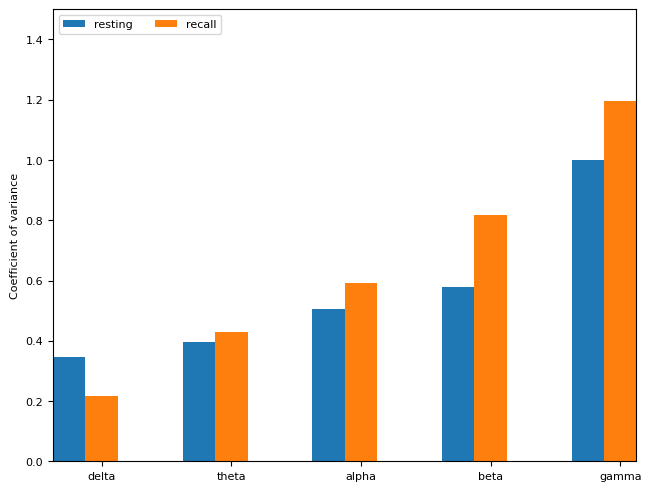

In [14]:
#sect_feat_bin = np.arange(0,3,1)   ##### delta     frequency corresponded to IM00-IM02 1 < w < 4
#sect_feat_bin = np.arange(3,6,1)   ##### theta     frequency corresponded to IM03-IM05 4 < w < 7
#sect_feat_bin = np.arange(7,12,1)  ##### alpha    frequency corresponded to IM07-IM11 8 < w < 13
#sect_feat_bin = np.arange(12,29,1) ##### beta      frequency corresponded to IM12-IM28 13 < w < 30
#sect_feat_bin = np.arange(29,45,1) ##### gamma     frequency corresponded to IM29-IM44 30 < w < 45

op_delta = open_seq_ave_df.iloc[:,0:3].mean(axis=1)
op_theta = open_seq_ave_df.iloc[:,3:6].mean(axis=1)
op_alpha = open_seq_ave_df.iloc[:,7:12].mean(axis=1)
op_beta = open_seq_ave_df.iloc[:,12:29].mean(axis=1)
op_gamma = open_seq_ave_df.iloc[:,29:45].mean(axis=1)

rec_delta = recall_seq_ave_df.iloc[:,0:3].mean(axis=1)
rec_theta = recall_seq_ave_df.iloc[:,3:6].mean(axis=1)
rec_alpha = recall_seq_ave_df.iloc[:,7:12].mean(axis=1)
rec_beta = recall_seq_ave_df.iloc[:,12:29].mean(axis=1)
rec_gamma = recall_seq_ave_df.iloc[:,29:45].mean(axis=1)

op_delta_cv = op_delta.std(ddof=1) / op_delta.mean()
op_theta_cv = op_theta.std(ddof=1) / op_theta.mean()
op_alpha_cv = op_alpha.std(ddof=1) / op_alpha.mean()
op_beta_cv = op_beta.std(ddof=1) / op_beta.mean()
op_gamma_cv = op_gamma.std(ddof=1) / op_gamma.mean()

rec_delta_cv = rec_delta.std(ddof=1) / rec_delta.mean()
rec_theta_cv = rec_theta.std(ddof=1) / rec_theta.mean()
rec_alpha_cv = rec_alpha.std(ddof=1) / rec_alpha.mean()
rec_beta_cv = rec_beta.std(ddof=1) / rec_beta.mean()
rec_gamma_cv = rec_gamma.std(ddof=1) / rec_gamma.mean()

# plt.ylim(0, 2)
# plt.plot(np.arange(1,46,1), a, color=color, linestyle=linestyle, linewidth=0.75)
# plt.plot(np.arange(1,46,1), b, color='red', linestyle=linestyle, linewidth=0.75)

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("delta", "theta", "alpha", "beta", "gamma")
penguin_means = {
    'resting': (op_delta_cv, op_theta_cv, op_alpha_cv, op_beta_cv, op_gamma_cv),
    'recall': (rec_delta_cv, rec_theta_cv, rec_alpha_cv, rec_beta_cv, rec_gamma_cv),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coefficient of variance')
#ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1.5)

plt.show()

F test

In [33]:
from scipy import stats

def f_test(g1, g2):
    
    var_g1 = stats.tvar(g1)
    var_g2 = stats.tvar(g2)
    
    cv_1 = g1.std(ddof=1)/g1.mean()
    cv_2 = g2.std(ddof=1)/g2.mean()
    
    if var_g1 > var_g2:
        n_g = g1
        d_g = g2
    else:
        n_g = g2
        d_g = g1
    
    n1 = len(d_g)
    n2 = len(n_g)

    dfn = n2 - 1
    dfd = n1 - 1
    var1 = stats.tvar(d_g)
    var2 = stats.tvar(n_g)
    f = var2/var1
    p_val = 1 - stats.f.cdf(f, dfn=dfn, dfd=dfd)
    
    return f, p_val, cv_1, cv_2

for g1, g2 in zip([op_delta, op_theta, op_alpha, op_beta, op_gamma],
                  [rec_delta, rec_theta, rec_alpha, rec_beta, rec_gamma]
                  ):
    
    f, p_val, cv_1, cv_2 = f_test(g1, g2)
    print(#'g1_ave=', np.round(g1.mean(), decimals=3),
          #'g2_ave=', np.round(g2.mean(), decimals=3),
          #'g1_sd=', np.round(g1.std(ddof=1), decimals=3),
          #'g2_sd=', np.round(g2.std(ddof=1), decimals=3),
          'g1_cv=', np.round(cv_1, decimals=3),
          'g2_cv=', np.round(cv_2, decimals=3),
          'f=', np.round(f, decimals=3),
          'p_val=', np.round(p_val, decimals=3)
          )

g1_cv= 0.346 g2_cv= 0.217 f= 1.345 p_val= 0.215
g1_cv= 0.396 g2_cv= 0.429 f= 2.024 p_val= 0.031
g1_cv= 0.504 g2_cv= 0.591 f= 2.827 p_val= 0.003
g1_cv= 0.578 g2_cv= 0.818 f= 2.874 p_val= 0.003
g1_cv= 1.001 g2_cv= 1.194 f= 2.515 p_val= 0.008
